# Signature and Log-signature for the Study of Empirical Distributions Generated with GANs.

J. de Curtò, I. de Zarzà, Hong Yan and Carlos T. Calafate.

{decurto,dezarza}@doctor.upv.es

---



In this notebook we are going to illustrate how to compute the PCA Adaptive t-SNE introduced in Section 4.2.


First, load your drive and make sure you have a folder with a dataset of your choice to visualize. Here we will use MetFaces (you can add a shortcut to drive from the original dataset found here https://github.com/NVlabs/metfaces-dataset).

### Parse all images in custom folder, save the data into array.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the following path accordingly with the full dataset to visualize (folder). 

In [ ]:
folder = '/content/drive/MyDrive/metfaces-release/images/'

Transform to grayscale, resize at 64x64 and flatten the samples to store them into a vector.

In [ ]:
import cv2
import os

data = []

for filename in os.listdir(folder):
    image = cv2.imread(os.path.join(folder,filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64,64))
        image = image.flatten()
        data.append([image, folder + filename])

Extract the information into arrays for further processing. Print the length.

In [ ]:
features, images  = zip(*data)
print(len(images))

1336


### PCA Adaptive t-SNE.

Instantiate a PCA object, which we will then fit our data to, choosing the adequate number of principal components to explain the **99% of variance**. Print the statistics.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=0.99, svd_solver='full')
pca.fit(features)
pca_features = pca.transform(features)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.n_components_)

[5.32016043e+06 1.16264451e+06 8.56700792e+05 6.14749559e+05
 5.76159422e+05 2.67091230e+05 2.27540097e+05 2.02094653e+05
 1.98874577e+05 1.40932761e+05 1.14569255e+05 9.75110836e+04
 9.23808733e+04 8.42119264e+04 7.96882747e+04 6.80377125e+04
 6.65010186e+04 5.96338809e+04 5.32983756e+04 5.06844448e+04
 4.68322704e+04 4.33801709e+04 4.05040470e+04 3.62701838e+04
 3.54882662e+04 3.44040289e+04 3.24526103e+04 3.12437268e+04
 2.82498973e+04 2.78216909e+04 2.71580235e+04 2.59978517e+04
 2.56295461e+04 2.38129747e+04 2.27797698e+04 2.21432837e+04
 2.11745952e+04 2.03747036e+04 1.97636767e+04 1.92423325e+04
 1.90520986e+04 1.83704268e+04 1.76981319e+04 1.68639248e+04
 1.62938677e+04 1.61933420e+04 1.56707335e+04 1.54377165e+04
 1.48490526e+04 1.45228175e+04 1.39630662e+04 1.36135568e+04
 1.32688218e+04 1.31785683e+04 1.28598861e+04 1.26141132e+04
 1.22209282e+04 1.18428178e+04 1.13759096e+04 1.12286464e+04
 1.10862540e+04 1.07681436e+04 1.06919329e+04 1.04651969e+04
 1.02770506e+04 1.012095

Choose how many images to plot.

In [ ]:
num_images_to_plot = len(images)

Choose selected random number of images from the full dataset. Here we use all available images.

In [ ]:
import random

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

Compute t-SNE.

In [ ]:
from sklearn.manifold import TSNE

X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1336 samples in 0.001s...
[t-SNE] Computed neighbors for 1336 samples in 0.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1336
[t-SNE] Computed conditional probabilities for sample 1336 / 1336
[t-SNE] Mean sigma: 893.350345
[t-SNE] Computed conditional probabilities in 0.148s
[t-SNE] Iteration 50: error = 71.9158020, gradient norm = 0.2288310 (50 iterations in 1.471s)
[t-SNE] Iteration 100: error = 71.9578094, gradient norm = 0.2385236 (50 iterations in 1.113s)
[t-SNE] Iteration 150: error = 72.6498947, gradient norm = 0.2167651 (50 iterations in 1.054s)
[t-SNE] Iteration 200: error = 71.9533691, gradient norm = 0.2143915 (50 iterations in 1.273s)
[t-SNE] Iteration 250: error = 72.0704346, gradient norm = 0.2174496 (50 iterations in 1.068s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.070435
[t-SNE] Iteration 300: error = 1.5848751, gradient norm = 0.0024605 (50 iterations in 1.210

Internally, t-SNE uses an iterative approach, making small (or sometimes large) adjustments to the points. By default, t-SNE will go a maximum of 1000 iterations, but in practice, it often terminates early because it has found a locally optimal (good enough) embedding.

The variable tsne contains an array of unnormalized 2d points, corresponding to the embedding. In the next cell, we normalize the embedding so that lies entirely in the range (0,1).

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

### Plot the t-SNE clusters.

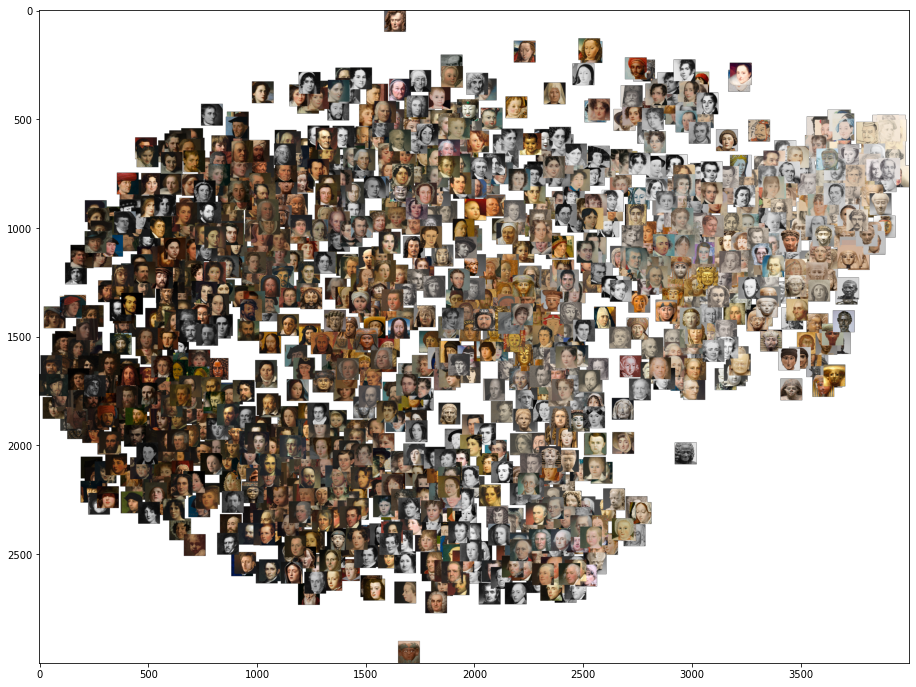

In [ ]:
import matplotlib.pyplot
from matplotlib.pyplot import imshow
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

### Save a json and a png of the t-SNE clusters.

Adapt the following paths accordingly to store the results in your drive.

In [ ]:
import os
import json

full_image.save("/content/drive/MyDrive/PCA_Adaptive_tSNE_metfaces.png")
tsne_path = "/content/drive/MyDrive/PCA_Adaptive_tSNE_metfaces.json"

data = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]
with open(tsne_path, 'w') as outfile:
    json.dump(data, outfile)

print("Saved t-SNE result to %s" % tsne_path)


saved t-SNE result to /content/drive/MyDrive/PCA_Adaptive_tSNE_metfaces.json


### Paste t-SNE clusters into grid.

In [ ]:
!pip install rasterfairy-py3

In [ ]:
import rasterfairy

nx = 70
ny = 72
grid_assignment = rasterfairy.transformPointCloud2D(tsne)

no good rectangle found for 1336 points, using incomplete square 36 * 38


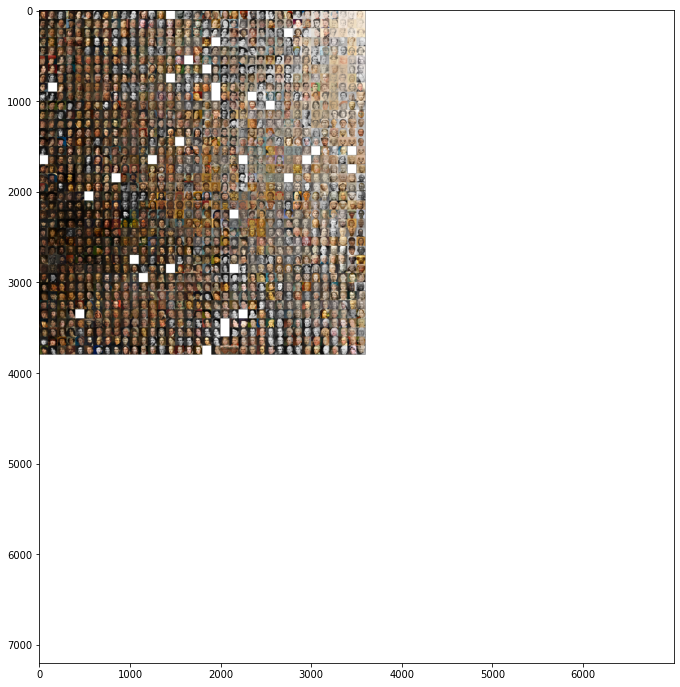

In [ ]:
tile_width = 100
tile_height = 100

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGBA', (full_width, full_height))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

Save the grid in your drive. Adapt the path accordingly.

In [ ]:
background = Image.new("RGB", grid_image.size, (255, 255, 255))
background.paste(grid_image, mask=grid_image.split()[3]) # 3 is the alpha channel

background.save('/content/drive/MyDrive/PCA_Adaptive_tSNE_grid_metfaces.png', 'PNG', quality=100)